In [65]:
import sys
sys.path.append('./training')
sys.path.append('./training_data')
import train_standard_NN
import train_BLL
import train_CQR
import save
from data_class import DataClass
from simulation_evaluation import simulation_evaluation

In [71]:
# training data set
training_name = './training data/training.xlsx'
test_name = './training data/test.xlsx'

# load data
training_data_dict, training_meta_data = save.read_excel(training_name)
test_data_dict, meta_data_test = save.read_excel(test_name)

# define keys from data sets which should be used for training
keys_states = ['T_PM', 'T_TM', 'c', 'd10', 'd50', 'd90']
keys_inputs = ['mf_PM', 'mf_TM', 'Q_g', 'w_crystal']

# define lag parameter l of NARX
l = 4

# define training parameters (rest will be different for different methods for best results in each case)
n_neurons = 30

# test data dataclass
test_data = DataClass(test_data_dict, keys_states, keys_inputs, l)

C:\Users\smcojohn\AppData\Local\miniconda3\envs\stochastic_sfc\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/2000, Train Loss: 0.1851457887866967, Val Loss: 0.13470025872811675, LR: 0.01
Epoch 11/2000, Train Loss: 0.13785079551834456, Val Loss: 0.12284832261502743, LR: 0.01
Epoch 21/2000, Train Loss: 0.1353871065755965, Val Loss: 0.11908996757119894, LR: 0.01
Epoch 31/2000, Train Loss: 0.1373658374371663, Val Loss: 0.12372014718130231, LR: 0.01
Epoch 41/2000, Train Loss: 0.13864536394535656, Val Loss: 0.12309775641188025, LR: 0.01
Epoch 51/2000, Train Loss: 0.1353283065410567, Val Loss: 0.12507317075505853, LR: 0.01
Epoch 61/2000, Train Loss: 0.13623465970158577, Val Loss: 0.12195876287296414, LR: 0.01
Epoch 71/2000, Train Loss: 0.1369884466411362, Val Loss: 0.12347482703626156, LR: 0.01
Epoch 81/2000, Train Loss: 0.1315033178199345, Val Loss: 0.11910139583051205, LR: 0.005
Epoch 91/2000, Train Loss: 0.13094819455184567, Val Loss: 0.12177994567900896, LR: 0.005
Epoch 101/2000, Train Loss: 0.13102171160805393, Val Loss: 0.1221291865222156, LR: 0.005
Epoch 111/2000, Train Loss: 0.131358

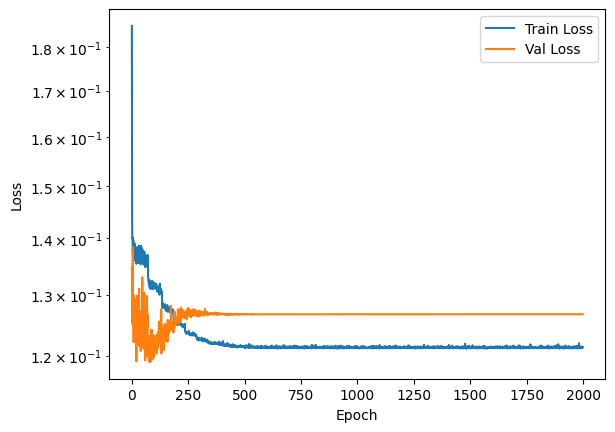

In [70]:
# train standard NN
training_data_NN = DataClass(training_data_dict, keys_states, keys_inputs, l)

model_NN = train_standard_NN.Approximate(training_data_NN, training_meta_data)
model_NN.setup(n_neurons=n_neurons, n_epochs=2000, learning_rate=0.01, weight_decay=1e-4, patience=50, lr_scheduler_factor=0.5)
model_NN.train()
# generate symbolic casadi function
model_NN.get_casadi_model()
# save model
model_NN.save('./data based models/NN_model.pkl')

MSE prediction: 0.007083163573128581
Average MSE: 0.046380920491115675


{'x': array([[3.18405452e+02, 3.18184619e+02, 1.87216023e-01, 2.62054442e-04,
         2.96539027e-04, 3.73816437e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87180823e-01, 2.55695953e-04,
         2.97856000e-04, 3.48913470e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87202624e-01, 2.48649626e-04,
         2.93956376e-04, 3.97383085e-04],
        ...,
        [3.17523665e+02, 3.17429626e+02, 1.81899052e-01, 3.08196965e-04,
         3.68375774e-04, 4.47860797e-04],
        [3.17540342e+02, 3.17428952e+02, 1.81901225e-01, 3.15119705e-04,
         3.49753883e-04, 4.04994557e-04],
        [3.17540255e+02, 3.17428813e+02, 1.82114203e-01, 3.11518570e-04,
         3.76505045e-04, 4.53120588e-04]]),
 'u': array([[7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.0000

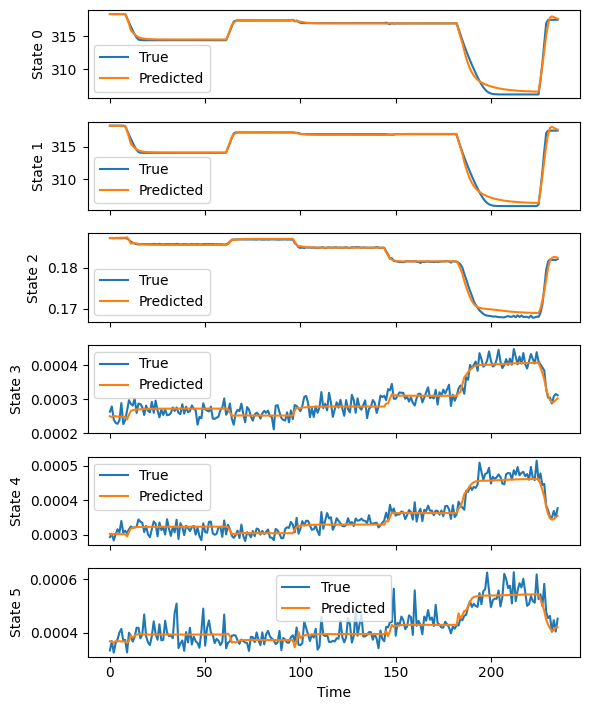

In [74]:
# test NN model
simulation_evaluation(test_data.states, test_data.inputs, model_NN, states=len(keys_states), data_test=test_data)

C:\Users\smcojohn\AppData\Local\miniconda3\envs\stochastic_sfc\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/2000, Train Loss: 0.3430860001789896, Val Loss: 0.2279376434162259, LR: 0.001
Epoch 11/2000, Train Loss: 0.20044575145370083, Val Loss: 0.19478486012667418, LR: 0.001
Epoch 21/2000, Train Loss: 0.19663663788845664, Val Loss: 0.19209014438092709, LR: 0.001
Epoch 31/2000, Train Loss: 0.19479306104936098, Val Loss: 0.1906864009797573, LR: 0.001
Epoch 41/2000, Train Loss: 0.194993173919226, Val Loss: 0.19017028901726007, LR: 0.001
Epoch 51/2000, Train Loss: 0.19381628256095082, Val Loss: 0.1883777780458331, LR: 0.001
Epoch 61/2000, Train Loss: 0.1920122527762463, Val Loss: 0.1882867068052292, LR: 0.001
Epoch 71/2000, Train Loss: 0.1903144055291226, Val Loss: 0.18832430336624384, LR: 0.0005
Epoch 81/2000, Train Loss: 0.1900175524385352, Val Loss: 0.1872200621291995, LR: 0.0005
Epoch 91/2000, Train Loss: 0.18961705345856517, Val Loss: 0.18760982807725668, LR: 0.00025
Epoch 101/2000, Train Loss: 0.18956307188460703, Val Loss: 0.18684446346014738, LR: 0.00025
Epoch 111/2000, Train Loss

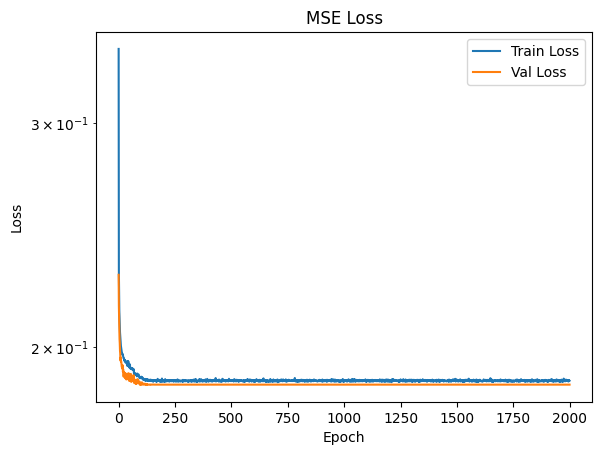

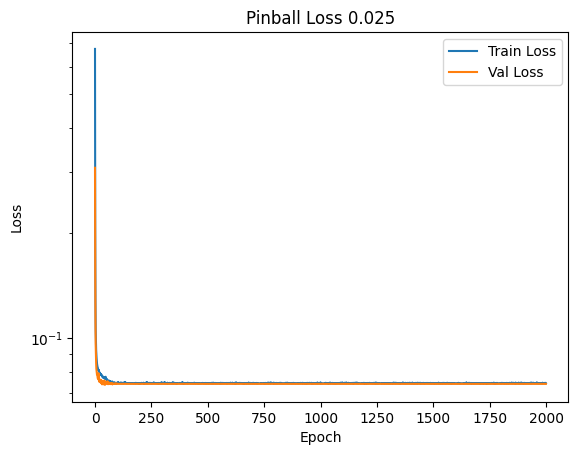

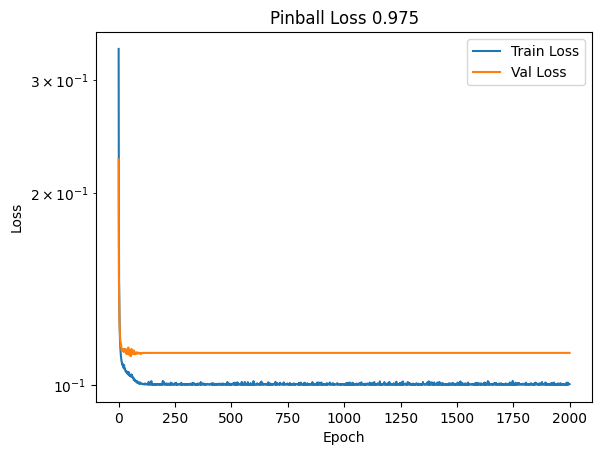

In [83]:
# train CQR model
training_data_CQR = DataClass(training_data_dict, keys_states, keys_inputs, l,  split_in_three=True)  # different because of needed calibration dataset

# define miscoverage rate
alpha = 0.05
quantiles = [alpha / 2, 1 - alpha / 2]

model_CQR = train_CQR.Approximate(training_data_CQR, quantiles, alpha, training_meta_data)
model_CQR.setup(n_neurons_mean=n_neurons, n_neurons_quantiles=10, batch_size=32, n_epochs_mean=2000,
                n_epochs_quantiles=2000, learning_rate=0.001, weight_decay_MSE=2e-5, weight_decay_quantiles=2e-5,
                patience_MSE=10, patience_quantiles=10, lr_scheduler_factor_MSE=0.5,
                lr_scheduler_factor_quantiles=0.5)
model_CQR.train()
# generate symbolic casadi function
model_CQR.get_casadi_model()
# save model
model_CQR.save('./data based models/CQR_model.pkl')

Coverage: 0.923728813559322
MSE prediction: 0.006153330164178323
Average MSE: 0.09106566129948292


{'x': array([[3.18405452e+02, 3.18184619e+02, 1.87216023e-01, 2.62054442e-04,
         2.96539027e-04, 3.73816437e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87180823e-01, 2.55695953e-04,
         2.97856000e-04, 3.48913470e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87202624e-01, 2.48649626e-04,
         2.93956376e-04, 3.97383085e-04],
        ...,
        [3.17523665e+02, 3.17429626e+02, 1.81899052e-01, 3.08196965e-04,
         3.68375774e-04, 4.47860797e-04],
        [3.17540342e+02, 3.17428952e+02, 1.81901225e-01, 3.15119705e-04,
         3.49753883e-04, 4.04994557e-04],
        [3.17540255e+02, 3.17428813e+02, 1.82114203e-01, 3.11518570e-04,
         3.76505045e-04, 4.53120588e-04]]),
 'u': array([[7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.0000

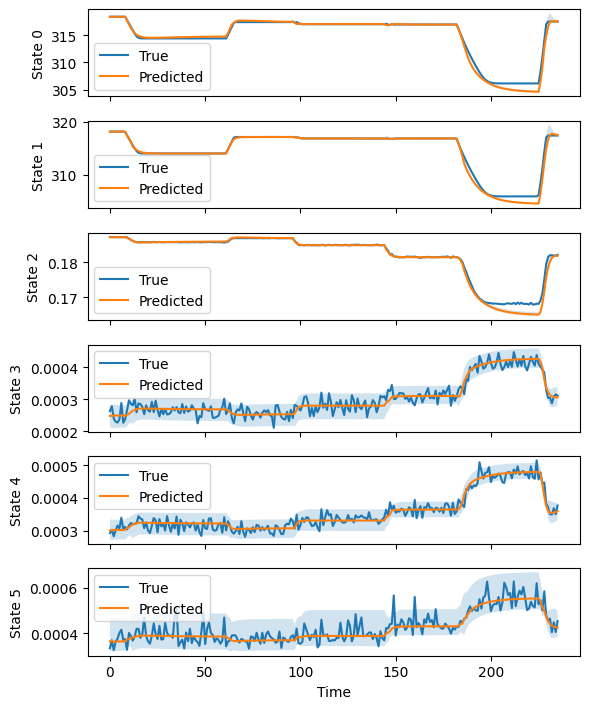

In [85]:
# test CQR model
# note that the coverage value is only senseful for prediction models and not for simulation models as here
simulation_evaluation(test_data.states, test_data.inputs, model_CQR, states=len(keys_states), data_test=test_data, **{'cqr':None})

	⏳Please wait: [██████████████████████████████████████████████████] 100.0% done - loss: -5.5672 - val_loss: -4.0283

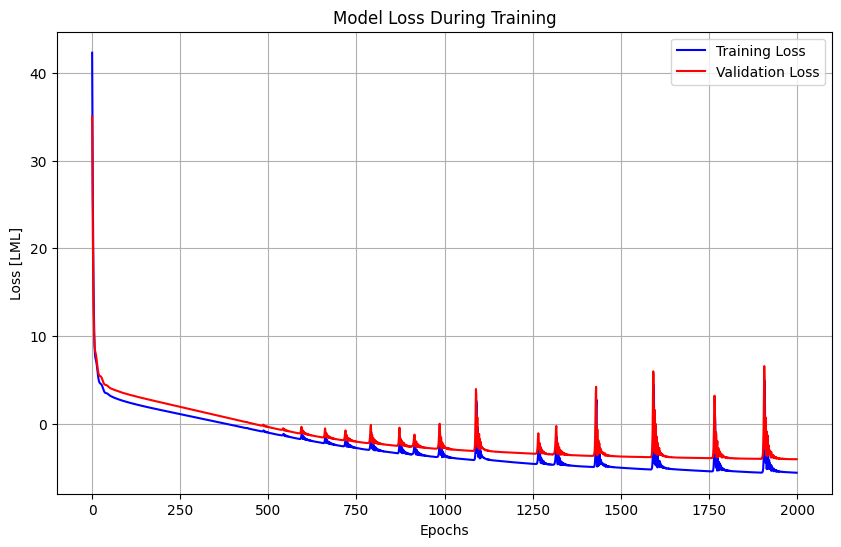

In [89]:
# train BLL model
training_data_BLL = DataClass(training_data_dict, keys_states, keys_inputs, l)

model_BLL = train_BLL.Approximate(training_data_BLL, training_meta_data)
model_BLL.setup(n_neurons=n_neurons, n_epochs=2000, learning_rate=0.004)
model_BLL.train()
# generate symbolic casadi function
model_BLL.get_casadi_model()
# save model
model_BLL.save('./data based models/BLL_model.pkl')

Coverage: 0.934322033898305
MSE prediction: 0.003842840652741074
Average MSE: 0.02239428654057244


{'x': array([[3.18405452e+02, 3.18184619e+02, 1.87216023e-01, 2.62054442e-04,
         2.96539027e-04, 3.73816437e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87180823e-01, 2.55695953e-04,
         2.97856000e-04, 3.48913470e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87202624e-01, 2.48649626e-04,
         2.93956376e-04, 3.97383085e-04],
        ...,
        [3.17523665e+02, 3.17429626e+02, 1.81899052e-01, 3.08196965e-04,
         3.68375774e-04, 4.47860797e-04],
        [3.17540342e+02, 3.17428952e+02, 1.81901225e-01, 3.15119705e-04,
         3.49753883e-04, 4.04994557e-04],
        [3.17540255e+02, 3.17428813e+02, 1.82114203e-01, 3.11518570e-04,
         3.76505045e-04, 4.53120588e-04]]),
 'u': array([[7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.0000

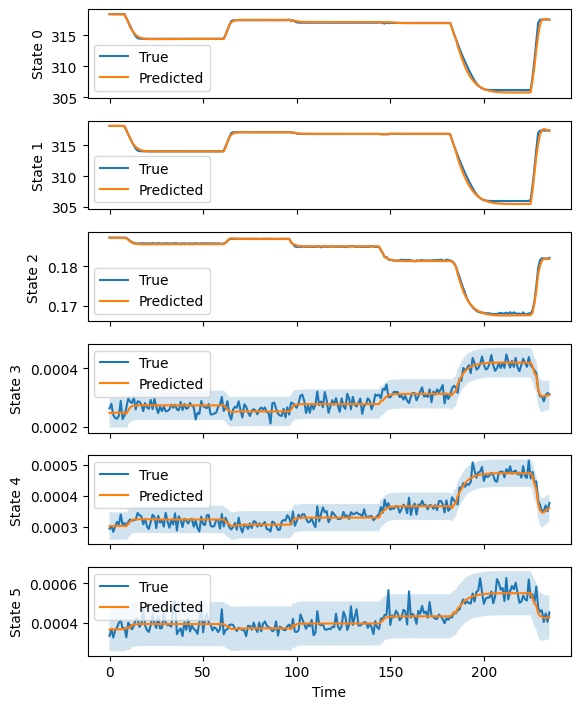

In [90]:
# test BLL model
simulation_evaluation(test_data.states, test_data.inputs, model_BLL, states=len(keys_states), data_test=test_data, **{'bll': model_BLL.std_with_noise})